In [1]:
import pandas as pd
import csv as csv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_df = pd.read_csv("train.csv", header=0)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.loc[train_df["Sex"] == "male", "Sex"] = 0
train_df.loc[train_df["Sex"] == "female", "Sex"] = 1
train_df.loc[train_df["Embarked"] == "S", "Embarked"] = 0
train_df.loc[train_df["Embarked"] == "C", "Embarked"] = 1
train_df.loc[train_df["Embarked"] == "Q", "Embarked"] = 2

In [5]:
namelabel = {"Mrs":0,"Mr":1,"Miss":2,"Master":3,"None":4}
namelabellist = []
for name in train_df["Name"]:
    for label in namelabel:
        if name.find(label) != -1:
            namelabellist.append(namelabel[label])
            break
    else:
        namelabellist.append(4)
train_df["NameLabel"] = namelabellist
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLabel
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,4
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,1


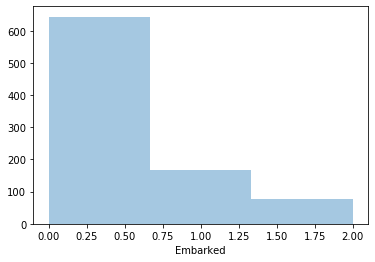

In [6]:
sns.distplot(train_df["Embarked"], kde=False, rug=False, bins=3) 

In [7]:
#欠損値の削除
train_df =train_df.dropna()

In [13]:
#one hot エンコーダー
Embarked_monehoten = OneHotEncoder()
arr_embarked = train_df["Embarked"].values
arr_embarked = arr_embarked.reshape(-1,1)
arr_embarked = np.ast(arr_embarked)

AttributeError: module 'numpy' has no attribute 'astyped'

In [11]:
onehot = Embarked_monehoten.fit_transform(arr_embarked)
print(onehot)


  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (158, 0)	1.0
  (159, 0)	1.0
  (160, 0)	1.0
  (161, 0)	1.0
  (162, 0)	1.0
  (163, 0)	1.0
  (164, 0)	1.0
  (165, 0)	1.0
  (166, 1)	1.0
  (167, 0)	1.0
  (168, 0)	1.0
  (169, 0)	1.0
  (170, 0)	1.0
  (171, 0)	1.0
  (172, 0)	1.0
  (173, 1)	1.0
  (174, 0)	1.0
  (175, 0)	1.0
  (176, 0)	1.0
  (177, 0)	1.0
  (178, 0)	1.0
  (179, 0)	1.0
  (180, 1)	1.0
  (181, 0)	1.0
  (182, 1)	1.0


In [10]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLabel
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,2
